# 环境介绍
本示例运行在本地windows进行。

# 本示例概要
因为我们在训练模型的时候，会需要大量的数据来进行训练，有些数据会来自于网路上爬虫爬下来，所以可以利用这样的方式帮助你快速爬到所需要的数据。

本示例主要是带大家透过爬虫api(Reader API)来解析网页内容，根据使用的LLM模型来解析内容产生SQL指令。

Ollama 的 預設模型 是 llama2（具體來說是 llama2:7b），但在这里我使用的是Mistral ，这是一種開源的大型語言模型 (LLM)，由 Mistral AI 公司開發。它的主要特點是 高效、輕量、性能強大，特別適合本地運行，並且能與 LLaMA 等模型競爭。

之后大家可以透过LLM解析过的sql语法，在自行汇入数据库。汇入数据库这段就不在这里示范。这边要说明的是因为考虑我电脑的性能，我选择在本地运行LLM所以挑选的模型是Mistral，可能在解析sql语法会有效能的差异，大家可以在这边根据自身的需求选择其他性能较好的模型。

1️⃣ 安装套件
在实作此范例，最好查看first_local_llm.ipynb 跟first_llm_talk_robot.ipynb里面来安装插件，此范例结合上面安装范例之外，还需安装langchain-community和langchain，用管理者的身份开启Anaconda Prompt 进行安装。


> pip install langchain langchain-community

> pip install -U langchain-ollama

2️⃣ 范例代码

1.   首先我们先把页面的代码进行撰写，并透过streamlit来查看页面











In [ ]:
import streamlit as st
from langchain_ollama  import OllamaLLM  # 會根據你的版本會有差異
import requests
from bs4 import BeautifulSoup #解析网页

st.title("Reader API + LLM 实现自动化爬虫跟ETL")
llm=OllamaLLM(model='mistral') #这边可以根据你使用的模型进行切换
#llm=Ollama(model='llama3')

def generate_response(text):
    for r in llm.stream(text):
        yield r

with st.form('my_form'): #web页面设计
    url_text = st.text_input('请输入要解析的网址','')
    QA_text = st.text_area('您想做怎么？','')
    submitted = st.form_submit_button('送出')
    if submitted:
        readerapi_url='https://r.jina.ai/'+url_text #这是readerapi的格式，前面是readerapi网址后面接着是你想解析的网址
        response = requests.get(readerapi_url)
        response.raise_for_status() #确保请求成功

        #生成您想对llm进行的prompt和网页内容的组合
        combined_text= QA_text + '\n --------------------------------' + ''.join(response.text)
        print(combined_text)
        #使用LLM处里组合的文本
        response_from_llm=''.join(generate_response(combined_text))#丢到模型产出生成的内容
        st.write(response_from_llm)


2.   打开Anaconda Prompt切换到上面python的脚本位置，执行cd python的脚本位置指令。

> cd C:\Users\joyce

3.   再来继续在Anaconda Prompt执行python -m streamlit run 您的程序名称。这里要注意streamlit版本，执行语法可能会有差异。你的第一个本地端自然语言对话程式就完成。



> python -m streamlit run use_crawler_LLM_ETL.py



4.   再页面输入要爬虫的网址与Prompt指令



> https://breezecinemas.tixi.com.tw/



> 请你根据内容如电影播放日期，电影名称与电影播放时间，帮我产生写入完整的insert sql指令，格式是insert into movschedule(m_date,name,m_time) values('','','')，你需要自己一步一步思考，最后产生出SQL的语法


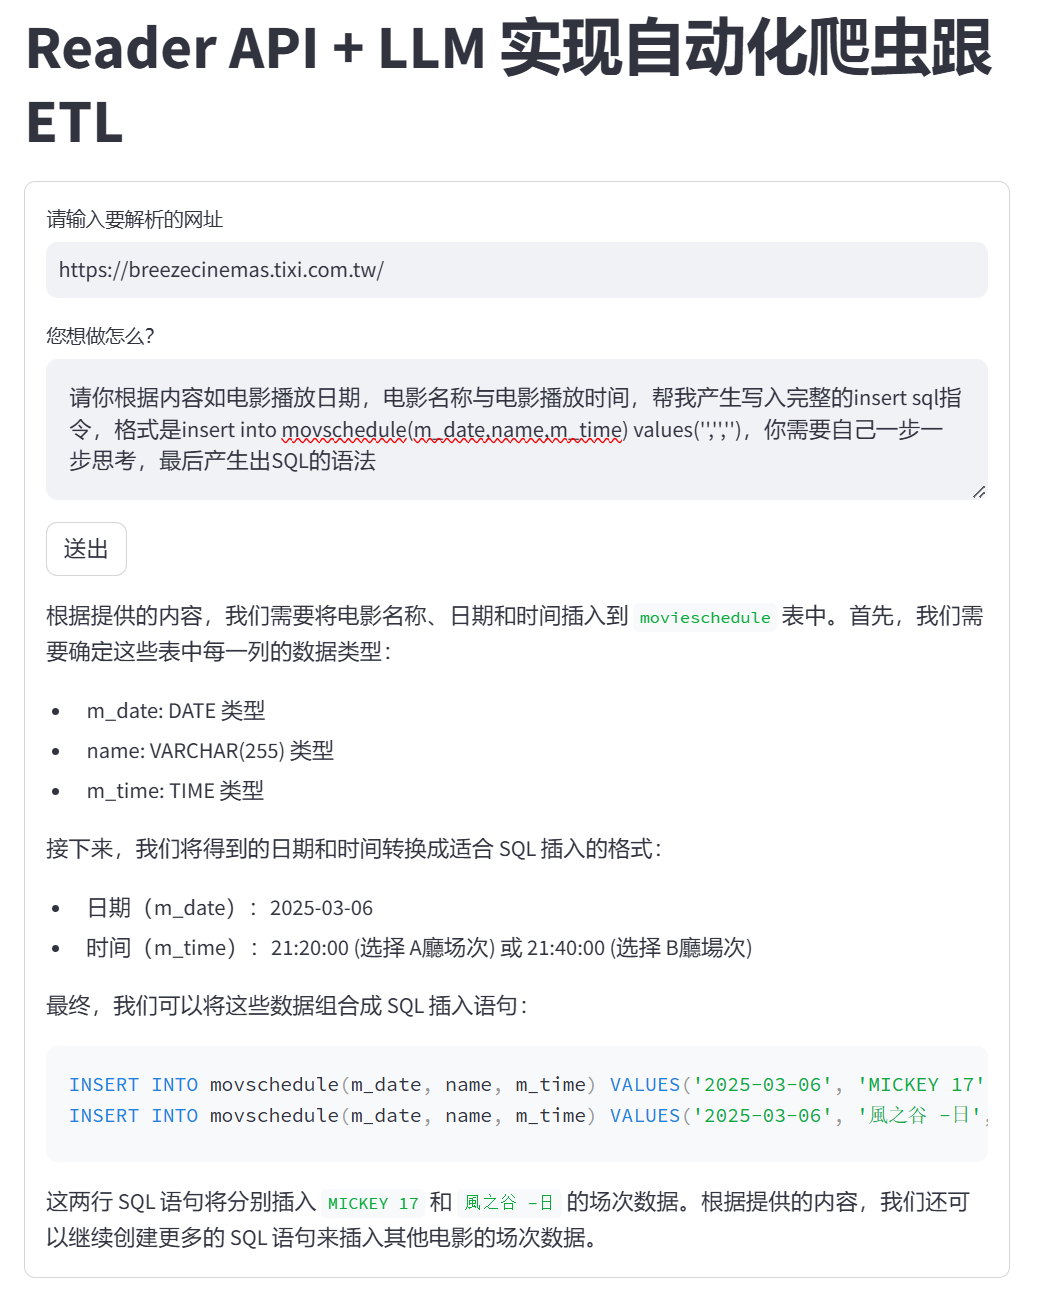
